In [1]:
!pip install --upgrade pip
!pip install --upgrade scikit-learn==0.23.0

     |████████████████████████████████| 1.5MB 6.0MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 7.3 MB 5.4 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report

MNIST - датасет образцов рукописного написания цифр, является стандартом, предложенным Национальным институтом стандартов и технологий США с целью калибрации и сопоставления методов распознавания изображений с помощью машинного обучения. Образцы из набора NIST были нормализированы, прошли сглаживание и приведены к серому полутоновому изображению размером 28x28 пикселей. 

In [3]:
from keras.datasets import mnist
(X_train, y_train), (X_pred, y_pred) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Первый элемент

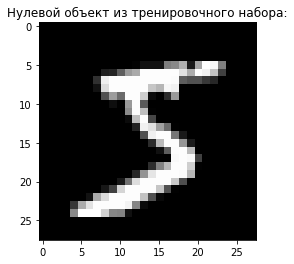

In [4]:
plt.title("Нулевой объект из тренировочного набора:")
plt.imshow(X_train[0], cmap="gray")

И его отклик

In [5]:
y_train[0]

5

Для разделения данных используем функцию train_test_split из библиотеки sklearn. Следующий код разделяет исходные данные в отношении 70/30.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=2020)


Преобразуем данные

In [7]:
dim = 784 # 28*28 
X_train = X_train.reshape(len(X_train), dim)
X_test = X_test.reshape(len(X_test), dim)

Уменьшим размерность тестовых данных

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=49, svd_solver='full')
modelPCA = pca.fit(X_train) 

X_train = modelPCA.transform(X_train)



Найдем долю объясненной дисперсии в зависимости от количества используемых ГК

In [9]:
explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_),3)
explained_variance


array([0.098, 0.168, 0.23 , 0.284, 0.333, 0.375, 0.408, 0.437, 0.464,
       0.488, 0.509, 0.53 , 0.547, 0.564, 0.579, 0.594, 0.608, 0.62 ,
       0.632, 0.644, 0.654, 0.664, 0.674, 0.683, 0.692, 0.7  , 0.708,
       0.716, 0.724, 0.731, 0.737, 0.744, 0.75 , 0.756, 0.761, 0.767,
       0.772, 0.777, 0.781, 0.786, 0.791, 0.795, 0.799, 0.803, 0.807,
       0.811, 0.815, 0.818, 0.821])

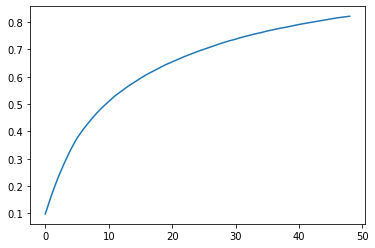

In [10]:
plt.plot(np.arange(49), explained_variance, ls = '-')

Подключаем библиотеку для обучения многоклассового классификатора методом One-vs-All и дерево принятия решений

In [11]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [12]:
tree = RandomForestClassifier(criterion='gini', min_samples_leaf=10, max_depth=20, n_estimators=10, random_state=2020)
clf = OneVsRestClassifier(tree).fit(X_train, y_train)

Примените полученное ранее преобразование метода главных компонент к тестовым данным

In [13]:
len(X_test[0])

784

In [14]:
modelPCA = pca.fit(X_test) 
X_test = modelPCA.transform(X_test)

In [15]:
y_pred = clf.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)

In [17]:
CM

array([[1363,    0,   71,   78,    2,   49,   30,   49,   48,    3],
       [   0, 1860,   51,   11,   11,    6,   47,   49,   35,    5],
       [  54,   10,  986,   57,   46,   94,  357,   25,  111,   23],
       [  29,    5,   55, 1521,   16,   93,    7,   39,   80,   28],
       [   6,    9,   56,    7, 1348,   14,   43,   30,   70,  173],
       [ 104,    5,  181,  240,   51,  556,    4,   66,  356,   28],
       [  30,   19,  782,   30,   24,   22,  713,   25,  102,   19],
       [  59,   41,   17,    7,   42,   13,   84, 1493,   30,  100],
       [  35,   44,  108,  268,   64,  534,   35,   14,  569,  102],
       [  26,   16,   27,   47,  413,   37,   31,  175,  119,  933]])

Число верно классифицирвоанных объектов класса 3


In [18]:
CM[3][3]

1521

In [19]:
target_names = ['class 0', 'class 1','class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9']

In [20]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.80      0.81      0.80      1693
     class 1       0.93      0.90      0.91      2075
     class 2       0.42      0.56      0.48      1763
     class 3       0.67      0.81      0.73      1873
     class 4       0.67      0.77      0.71      1756
     class 5       0.39      0.35      0.37      1591
     class 6       0.53      0.40      0.46      1766
     class 7       0.76      0.79      0.78      1886
     class 8       0.37      0.32      0.35      1773
     class 9       0.66      0.51      0.58      1824

    accuracy                           0.63     18000
   macro avg       0.62      0.62      0.62     18000
weighted avg       0.63      0.63      0.62     18000



In [21]:
print(clf.predict_proba(X_train) [11064] [y_pred[6]] )
print(clf.predict_proba(X_train) [27490] [y_pred[6]] )
print(clf.predict_proba(X_train) [34966] [y_pred[6]] )
print(clf.predict_proba(X_train) [31825] [y_pred[6]])
print(clf.predict_proba(X_train) [23054] [y_pred[6]] )

0.0649368243413738
0.015237449473605036
0.0010274515698591564
0.0014037454595052872
0.0004772562025719084
